In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ALookAtTheData as t
from IPython import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline



# Business Understanding
 
AirBNB provides a convenient platform for hosts to rent their properties. The options to choose different property types, #of bedrooms,accomodation,diffrent neighborhood based on the reviews offers a lot to potential guests looking to stay in one of the locations. 

The dataset retrieved is a collection of property listings, their key features and types, such as property type, host type, neighborhood, reviews and so on.
As the Seattle AirBNB datafiles are provided to us from Kaggle,there are numerous ways to interpret and gather insights from this data.
For the purpose of this project, the main business question that I would like to answer are:

1.How are the listings distributed by various property types?
2.What is the average price of listings by neighborhood?
3.What are the most expensive months to travel to Seattle in terms of booking prices?
4.What are the main factors that influence the price of the listings?

# Data Understanding

In [4]:
listings_df = pd.read_csv('./listings.csv')
reviews_df = pd.read_csv('./reviews.csv')
calendar_df = pd.read_csv('./calendar.csv')

In [5]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [7]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [8]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


# Data Preparation (listings_df &  calendar_df)
1. Listings and calendar data needs to be cleaned for NAN and columns with low # of entries
2. Drop columns which have more than 20% of NAN records
3. Convert Date fields from string to Date format
4. Convert Price column to numeric
5. Apply mean value of numeric columns to fill in NA values 

In [9]:
#Check for columns with NA values in the listings file
listings_df.columns[listings_df.isnull().any()]

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'zipcode', 'property_type', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'reviews_per_month'],
      dtype='object')

In [10]:
# List out the columns with % NAN values as these will be used for further analysis
   
print (round((listings_df.isnull().sum() * 100/ len(listings_df)),2).sort_values(ascending=False))


license                             100.00
square_feet                          97.46
monthly_price                        60.27
security_deposit                     51.13
weekly_price                         47.38
notes                                42.06
neighborhood_overview                27.03
cleaning_fee                         26.98
transit                              24.46
host_about                           22.50
host_acceptance_rate                 20.25
review_scores_accuracy               17.23
review_scores_checkin                17.23
review_scores_value                  17.18
review_scores_location               17.16
review_scores_cleanliness            17.10
review_scores_communication          17.05
review_scores_rating                 16.95
reviews_per_month                    16.42
first_review                         16.42
last_review                          16.42
space                                14.90
host_response_time                   13.70
host_respon

In [11]:
# If we retain all the columns which have huge # of NAN values, then the final model might become skewed and show bias.
# There is also a possibility of the model being overfit
# Based on the above output, we will drop the columns with more than 20% NAN values and that way we will have a better dataset used to tran the model
drop_columns = ['license','square_feet','monthly_price','security_deposit','weekly_price','notes','neighborhood_overview',
                'cleaning_fee','transit','host_about','xl_picture_url','thumbnail_url','medium_url','host_thumbnail_url',
                'host_picture_url','listing_url','picture_url','host_id','host_url']
listings_df.drop(columns = drop_columns,axis = 1, inplace=True)

In [12]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 73 columns):
id                                  3818 non-null int64
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
host_name                           3816 non-null object
host_since                          3816 non-null object
host_location                       3810 non-null object
host_response_time                  3295 non-null object
host_response_rate                  3295 non-null object
host_acceptance_rate                3045 non-null object
host_is_superhost                   3816 non-null object
host_neighbourhood                  3518

In [13]:
# For numeric columns with missing values, we will impute them by using the mean of that specific column such as the review score columns and the host related columns
# For bathrooms and bedrooms, we will use the mode to fill the NA values
import datetime
#fill in missing values for bathrooms, bedrooms and beds with mode
listings_df['bathrooms'] = listings_df['bathrooms'].fillna(listings_df['bathrooms'].mode()[0])
listings_df['bedrooms'] = listings_df['bedrooms'].fillna(listings_df['bedrooms'].mode()[0])
listings_df['beds'] = listings_df['beds'].fillna(listings_df['beds'].mode()[0])

#convert price and extra_people to number
listings_df['price'] = listings_df['price'].astype(str)
listings_df['price'] = listings_df['price'].str.replace("[$, ]", "").astype("float")
listings_df['extra_people'] = listings_df['extra_people'].astype(str)
listings_df['extra_people'] = listings_df['extra_people'].str.replace("[$, ]", "").astype("float")
        
#fill missing values for review scores columns
#To avoid bias in result,use mean to fill na values
review_scores_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                        'review_scores_value','reviews_per_month']
for column in review_scores_columns:
    listings_df[column].fillna(listings_df[column].mean(), inplace = True)

listings_df['host_acceptance_rate'].fillna(method = 'bfill', inplace = True)
listings_df['host_response_rate'].fillna(method = 'bfill', inplace = True)

listings_df['host_response_time'].fillna(method = 'bfill', inplace = True)
listings_df['host_acceptance_rate'].fillna(method = 'ffill', inplace = True)    

#Remove % sign and convert the data type to int for host_response_rate and host_acceptance_rate and fill na values with respective mean
listings_df['host_response_rate'] = listings_df['host_response_rate'].astype(str)
listings_df['host_response_rate'] = listings_df['host_response_rate'].str.replace("%", "").astype("float")
listings_df['host_acceptance_rate'] = listings_df['host_response_rate'].astype(str)
listings_df['host_acceptance_rate'] = listings_df['host_response_rate'].astype("float")

#fill missing values with mean value for host_listings_count
listings_df['host_response_rate'].fillna(listings_df['host_response_rate'].mean(), inplace = True)
listings_df['host_acceptance_rate'].fillna(listings_df['host_acceptance_rate'].mean(), inplace = True)
listings_df['host_listings_count'].fillna(listings_df['host_listings_count'].mean(), inplace = True)
listings_df['host_total_listings_count'].fillna(listings_df['host_listings_count'].mean(), inplace = True)

#Convert host_since to days
listings_df['host_since'] = listings_df['host_since'].astype(str)
listings_df['host_since'] = listings_df['host_since'].str.replace("[-, ]", "").astype("float")
#listings_df['host_since'].fillna(listings_df['host_since'].mean(), inplace = True)
enddate = listings_df['host_since'].max().astype("int")
print(enddate)
# We are creating a new object called host_duration based on host since
#host_duration will be calculated in days and might be a better feature for the model 
date_obj = datetime.datetime.strptime(str(enddate),'%Y%m%d').date()
listings_df['host_duration'] = date_obj - pd.to_datetime(listings_df['host_since'], format='%Y%m%d').dt.date
listings_df['host_duration'] = listings_df['host_duration'].dt.days
listings_df['host_duration'].fillna(listings_df['host_duration'].mean(), inplace = True)

20160103


In [14]:
#Collect all int and float columns
#Add hot-encoded columns
# Create dummy columns of cancellation policy, room type, property type,bed type,host_response,and host_is_superhost

cancellation_policy_dummy_df = pd.get_dummies(listings_df['cancellation_policy'], prefix = 'cancellation_policy')
room_type_dummy_df = pd.get_dummies(listings_df['room_type'], prefix = 'room_type')
property_type_dummy_df = pd.get_dummies(listings_df['property_type'], prefix = 'property_type')
bed_type_dummy_df = pd.get_dummies(listings_df['bed_type'], prefix = 'bed_type')
host_response_time_dummy_df = pd.get_dummies(listings_df['host_response_time'], prefix = 'host_response_time')
host_is_superhost_dummy_df = pd.get_dummies(listings_df['host_is_superhost'], prefix = 'host_is_superhost')


# Create dummy columns based on the ammenities

# Drop rows with empty rows
amenities_series = listings_df['amenities']
#amenities_series = amenities_series[amenities_series != '{}']

# Iterate over rows and format them as list
amenities_list = []

for index, row in amenities_series.items():
    amenities_list.append(row.replace('{','').replace('}','').replace('"','').split(','))

# Convert the list to a data frame
amenities_df = pd.Series(amenities_list, name = 'amenities').to_frame()

# Create a dummy data frame
dummies_amenities_df = amenities_df.join(
    pd.get_dummies(
        pd.DataFrame(amenities_df.amenities.tolist()).stack()
    ).astype(int).sum(level=0)
)

dummy_df = pd.concat([cancellation_policy_dummy_df, room_type_dummy_df, property_type_dummy_df, bed_type_dummy_df, dummies_amenities_df, host_response_time_dummy_df, host_is_superhost_dummy_df], axis = 1)





In [15]:
#Concat Listings_df to include all int and float columns with dummy_df which contains all hot-encoded column values
new_listings_df = pd.concat([listings_df.select_dtypes(include = ['int', 'float']), dummy_df], axis = 1)


In [16]:
# For the new host_duration numeric column, we will fill Na values with mean of host_duration
new_listings_df['host_duration'].fillna(listings_df['host_duration'].mean(), inplace = True)
#We will drop 'host_since','amenities', and 'scrape_id' columns as we have already cretaed new columns based on these
new_listings_df.drop(columns=['host_since','amenities','','scrape_id'],axis = 1, inplace = True)
df = new_listings_df[new_listings_df.isna().any(axis=1)]
df.info()
# Check if the new_listings df has any NA values as this will lead the model to fail while trying to split the data and fit it
df.columns[df.isnull().any()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Columns: 105 entries, id to host_is_superhost_t
dtypes: float64(20), int64(52), uint8(33)
memory usage: 0.0 bytes


Index([], dtype='object')

In [17]:
# Data preparation -  Clean Calender Data
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [18]:
# Clean Calender Data
# Create new columns for month and year based on the date column

calendar_df['day'] = pd.to_datetime(calendar_df['date']).dt.day
calendar_df['month'] = pd.to_datetime(calendar_df['date']).dt.month
calendar_df['year'] = pd.to_datetime(calendar_df['date']).dt.year
#convert price to number
calendar_df['price'] = calendar_df['price'].astype(str)
calendar_df['price'] = calendar_df['price'].str.replace("[$, ]", "").astype("float")
#Drop rowns with na value in price column
calendar_df.dropna(axis = 0, subset = ["price"], inplace = True)


In [19]:
calendar_df.drop(columns = ['available','date'],axis = 1, inplace = True)
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 5 columns):
listing_id    934542 non-null int64
price         934542 non-null float64
day           934542 non-null int64
month         934542 non-null int64
year          934542 non-null int64
dtypes: float64(1), int64(4)
memory usage: 42.8 MB


In [20]:
# Merge Listings and Calender Datasets on listings_id
new_listings_df = new_listings_df.rename(index=str,columns={"id": "listing_id"})
combined_df = pd.merge(calendar_df,new_listings_df, on = 'listing_id')
list(combined_df.columns.values)



['listing_id',
 'price_x',
 'day',
 'month',
 'year',
 'host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price_y',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month',
 'host_duration',
 'cancellation_policy_flexible',
 'cancellation_policy_moderate',
 'cancellation_policy_strict',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room',
 'property_type_Apartment',
 'property_type_Bed & Breakfast',
 'property_type_Boat',
 'property_type_Bungalow',
 'property_type_

# Date Modeling to predict price
1.Data split into training and test data
2.Two models will be used for testing - Linear Regression model and Random Forest Regressor
3.We will choose the model with better r2-score in determining the most critical features in predicting the price of the listing 

In [21]:
# Splitting dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
def data_split(features,target):
    """
    Split the 'features' and 'target' data into training and testing sets
    
    PARAMETERS:
       - features: set of columns from the final dataset selected to be the fetures of the model to be implemented
       - target : contains the 'price' column values which we intend to predict
    RETURNS:
        Returns the training and test values for the selcted features and target parameters.
    """       
    #fit and transform scaling on training data
    # Split the 'features' and 'target' data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.20,random_state = 42,stratify=target)
    scaler = StandardScaler()
    X_train=scaler.fit(X_train)
    #scale test data
    X_test=scaler.transform(X_test)
    # Display result after splitting..
    print("results of the split\n------")
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    print("\nclass distribution\n------")
    print('y_train class distribution')
    print(y_train.value_counts(normalize=True))
    print('y_test class distribution')
    print(y_test.value_counts(normalize=True))
    return X_train, X_test, y_train, y_test

In [22]:

def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    Takes a learning algorithm and uses it to train and predict the samples and returns the performance.
    
    PARAMETERS:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: label training set
       - X_test: features testing set
       - y_test: label testing set
    RETURNS
        Performance results for the learning algorithm.
    '''
    
    results = {}
    #Fit the learner to the training data and get training time
    learner = learner.fit(X_train, y_train)
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    #add training accuracy to results
    results['training_score']=learner.score(X_train,y_train)
    #add testing accuracy to results
    results['testing_score']=learner.score(X_test,y_test)
    print("{} trained on {} samples.".format(learner.__class__.__name__, len(y_train)))
    print("Training accuracy:%.4f" % results['training_score'])
    print("Test accuracy:%.4f" % results['testing_score'])
    print(classification_report(y_test, predictions_test,digits=4))
    tn, fp, fn, tp = conf_mtx = confusion_matrix(y_test, predictions_test).ravel()
    con_mtx = np.array([[tp, fn],[fp, tn]])
    # Confusion Matrix visualization
    plot_confusion_matrix(cm = con_mtx,normalize = False,target_names = ['positive', 'negative'],title = "Confusion Matrix")
    return results


In [23]:
import matplotlib.pyplot as plt
def test_model(clf_A,clf_B):
    """
    Takes the selected models for prediction as an input.
    We are considering 2 models for comparison
    
    PARAMETERS:
       - clf_A model1
       - clf_B model2 
    RETURNS
        Performance results for each of the selected model.
    """    
    # Collect results on the learners
    results = {}
    for clf in [clf_A,clf_B]:
        clf_name = clf.__class__.__name__ + '_' +'Features For Predicting AirBNB Prices In Seattle'
        results[clf_name] = {}
        results[clf_name]= train_predict(clf, X_train, y_train, X_test, y_test)
    return pd.DataFrame(results)

# Evaluate Results


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Selecting the columns for the features and the target set
# We will take all the columns from the combined df for features and dropt the price column
# For target set, ONLY price column will be considered as the model is intended to predict the price
target_set = combined_df['price_x']
features_set =  combined_df.copy()
features_set.drop(columns=['price_x','price_y','listing_id','latitude','longitude'], axis = 1, inplace = True)


xtrain, xtest, ytrain, ytest = train_test_split(features_set, target_set, test_size=0.2, random_state=42)

# We will use 2 models for comparion of performance and results namely the RandomForestRegressor and the LinearRegression model
# We will use R-squared score = Explained variation / Total variation
#In general, the higher the R-squared, the better the model fits the data

#Implemont RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1)
model.fit(xtrain, ytrain.squeeze())

ypred = model.predict(xtrain)
ypredtest = model.predict(xtest)

r2 = r2_score(ytrain, ypred)
r2test = r2_score(ytest, ypredtest)
print('MSE train ( Random Forest): %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ypred),
        mean_squared_error(ytest, ypredtest)))
print("Training r2-score(Random FOrest): %.4f,  Test r2-score: %.4f" % (r2, r2test))

#Implement Logistic Regression model
lgr = LinearRegression()
lgr.fit(xtrain,ytrain)

#calculate and print scores for the model for top 15 features
y_train_preds = lgr.predict(xtrain)
y_test_preds = lgr.predict(xtest)

print('MSE train: %.3f, test(Linear Regression): %.3f' % (
        mean_squared_error(ytrain, y_train_preds),
        mean_squared_error(ytest, y_test_preds)))
print('R^2 train: %.3f, test(Linear Regression): %.3f' % (
        r2_score(ytrain, y_train_preds),
        r2_score(ytest, y_test_preds)))



MSE train ( Random Forest): 20.478, test: 148.783
Training r2-score(Random FOrest): 0.9981,  Test r2-score: 0.9864
MSE train: 4201.147, test(Linear Regression): 4125.993
R^2 train: 0.620, test(Linear Regression): 0.623


In [25]:
import matplotlib.pyplot as pl
def feature_plot(importances, X_train, y_train, n=15):
    """
    Takes the feature importances from the model
    
    
    PARAMETERS:
       - importances :feature importances from the model clf_A model1
       - X_train :features training data set.
       - y_train :label training set.
    RETURNS
        Bar plot with all features importance based on thier weightage
    """    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:n]]
    values = importances[indices][:n]

    # Creat the plot
    fig = pl.figure(figsize = (10,5))
    pl.title(f"Normalized Weights for First {n} Predictive Features(Random Forest)", fontsize = 16)
    pl.bar(np.arange(n), values, width = 0.6, align="center", color = '#E26741', \
          label = "Feature Weight")
    #pl.bar(np.arange(n) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#8E1FEF', \
          #label = "Cumulative Feature Weight")
    pl.xticks(np.arange(n), columns,rotation='vertical')
    #pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    #pl.legend(loc = 'upper left')
    pl.tight_layout()
    sns.despine(bottom=True, left=True)
    pl.show()


# Visualizations to answer business questions


# Question 1:How are the listings distributed by various property types?

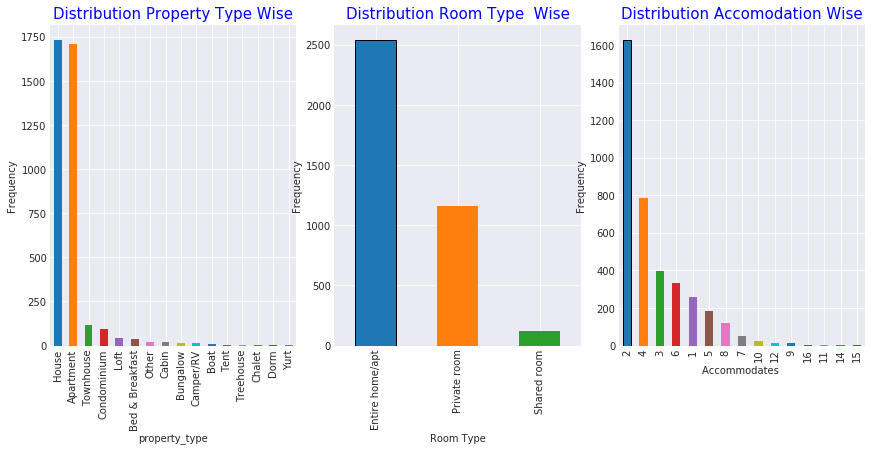

In [26]:
#Creating Subplots for distribution based on Property Type,Room Type,and Accomodation Wise
sns.set_style('darkgrid')
fig,ax= plt.subplots(1,3,sharex=False, sharey=False,figsize=(12,5))
fig.tight_layout()
# property_type BASED
listings_df.property_type.value_counts().plot.bar(ax=ax[0],fontsize=10) 
ax[0].set_title("Distribution Property Type Wise", fontsize=15,color='blue')
ax[0].set_xlabel("property_type", fontsize=10)
ax[0].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)


# Room Type  BASED
listings_df.room_type.value_counts().plot.bar(ax=ax[1],fontsize=10,edgecolor='black') 
ax[1].set_title("Distribution Room Type  Wise", fontsize=15,color='blue')
ax[1].set_xlabel("Room Type", fontsize=10)
ax[1].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)

# Accomodates BASED
listings_df.accommodates.value_counts().plot.bar(ax=ax[2],fontsize=10,edgecolor='black') 
ax[2].set_title("Distribution Accomodation Wise", fontsize=15,color='blue')
ax[2].set_xlabel("Accommodates ", fontsize=10)
ax[2].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)

plt.show()

1.After performing the initial cleanup of all files in the dataset, when we run an analysis on the listings dataset, we find bulk of the listings are of Property Type House or Apartment
2.'Entire home/Apartment’ seems to be the most popular kind of Room Type by listings
3.Reviewing the ‘Accomodates’ chart, it looks like an accommodation for 2 is definitely most popular and widely offered followed by accommodation for 4.

# Question 2:What is the average price of listings by neighborhood?


(87.5, -0.5)

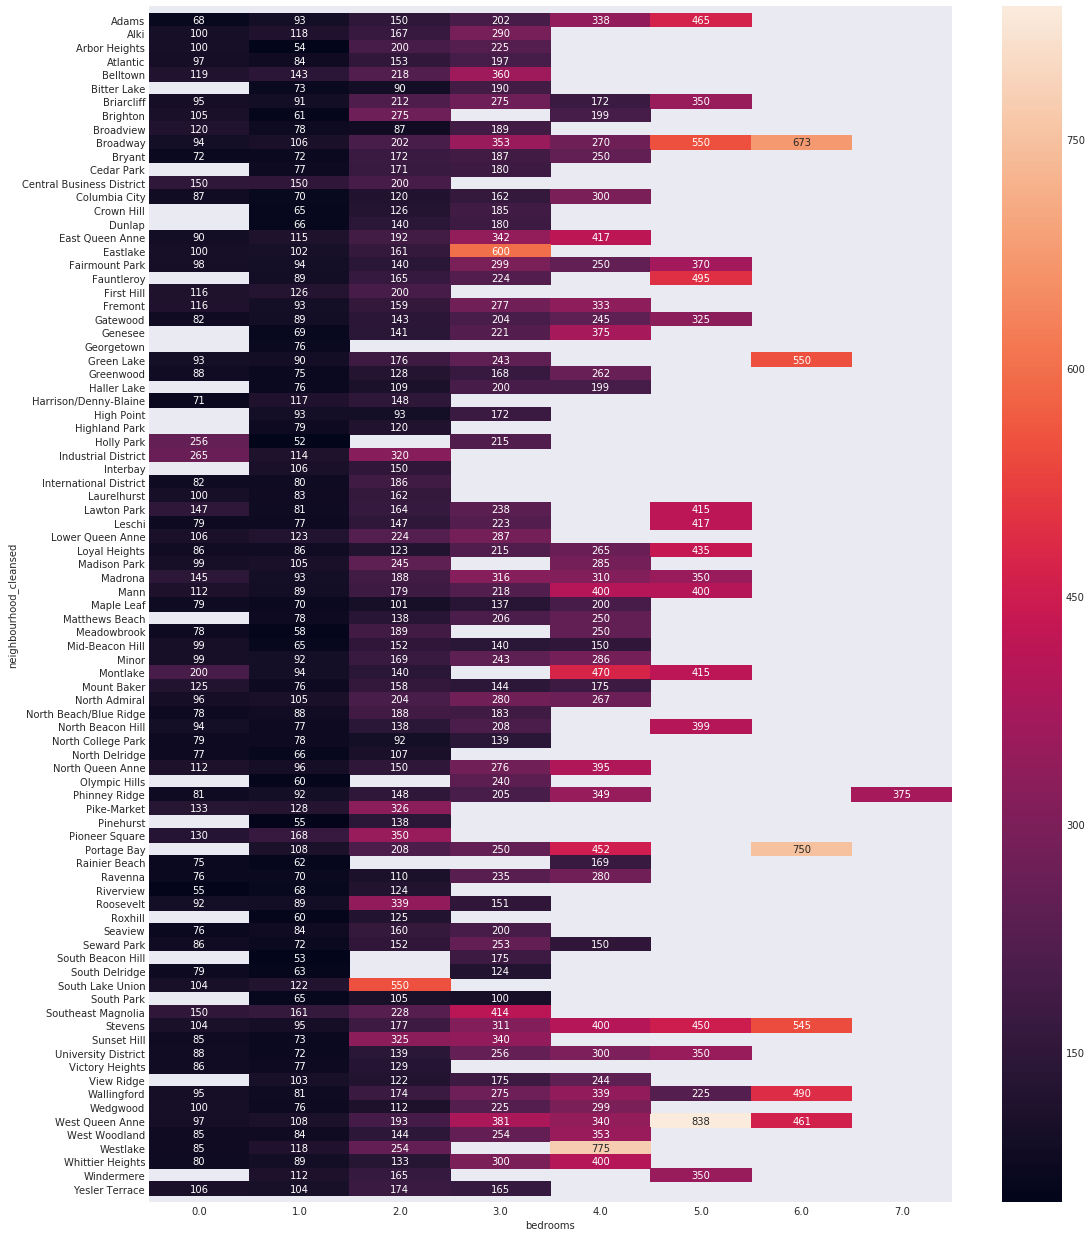

In [27]:
#Heat map to show the average price of the listing grouped by 'neighbourhood_cleansed', 'bedrooms'
plt.figure(figsize=(18,22))
ax = sns.heatmap(listings_df.groupby([
        'neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

1.Based on the heat map, we can conclude the average price for 5 bedrooms is the most expensive in West Queen Anne neighborhood at $838
2.Four bedrooms average price is the most expensive in Westlake neighborhood at $775 and six bedrooms average price is the most expensive in Portage Bay at $750.



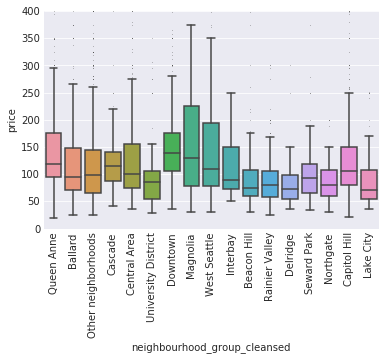

In [28]:
ax = sns.boxplot(data=listings_df, x='neighbourhood_group_cleansed', y='price', fliersize=0.1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, 400);

In the bar chart, if we look at the neighborhood grouping data, we find that Magnolia and West Seattle host the most expensive listings.

# Question 3:What are the most expensive months to travel to Seattle in terms of reservation prices?

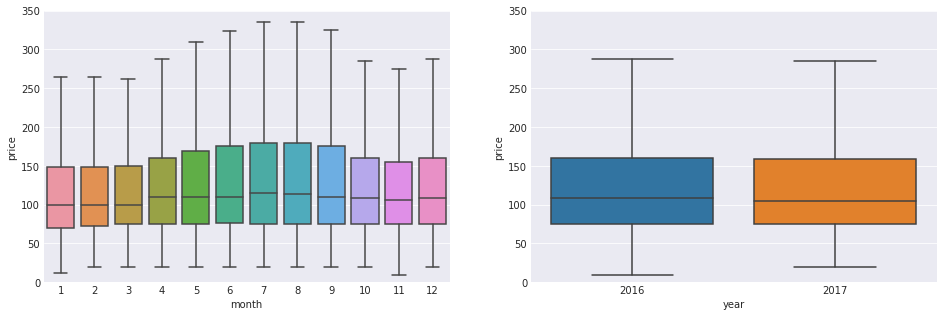

In [29]:
# Which part of the year are the reservation prices higher ( Based on the Calendar Data)
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(data=calendar_df, x='month', y='price', ax=axs[0], fliersize=0)
sns.boxplot(data=calendar_df, x='year', y='price', ax=axs[1], fliersize=0)

for ax in axs:
    ax.set_ylim(0, 350)

1.Based on the charts, June through September seems to be a busy time in Seattle and the reservation prices shoot up. This is probably understandable considering the summer months.

2.In comparison to year 2016 to 2017, there is not much difference in the way data is distributed . We can assume that the trend is pretty same.

# Question 4:What are the main factors that influence the price of the listings?

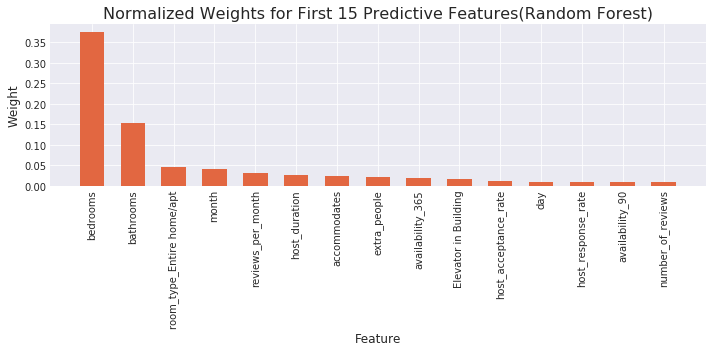

In [30]:
#get feature importances from the model
importances = model.feature_importances_

# Plot
feature_plot(importances, xtrain, ytrain, 15)

After running the analysis using RandomForest Regressor and Linear Regession models, the performance metrics are much better using the RandomForest Regressor 
MSE train ( Random Forest): 20.478, test: 148.783
Training r2-score(Random FOrest): 0.9981,  Test r2-score: 0.9864
We run the feature importance based on the RandomForest Regressor and the chart shows the top 15 critical features in predicting price
It is clear that the # of Bedrooms is the most critical feature in impacting the price followed by the # of bathrooms and the Room type specifically Entire Home/Apartment. We already noticed that ‘Entire Home/Apartment’ is quite a popular Property Type and had maximum # of listings.

# Conclusion
Based on the above analysis, we have tried to answer the following business questions.
Based on the implementation of the two models, we find Random Forest Regressor perform much better than Linear Regression model and hence we choose Random Forest Regressor to find the most important features in predicting price to answer our last business question
We have succesfully answered the top 4 business questions based on the data provided and testing the models.

1. How are the listings distributed by various property types?
2. What is the average price of listings by neighborhood?
3. What are the most expensive months to travel to Seattle in terms of reservation prices?
4. What are the main factors that influence the price of the listings?